In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.rcParams['text.usetex'] = True

# Mendefinisikan simulasi tangki
dengan output seperti yang di ppt.<br>
rho = 1000 Kg.m^3 <br>
A = 1m^2

ini parameter inputnya, ada level dimana level ini akan menentukan Level Cairan pada tangki dan time untuk periodik waktu, c sebagai konstanta isi tangki, dan valve sebagai keran outlet/inlet

In [ ]:
def tank(Level, time, c, valve):
  rho = 1000.0
  A = 1.0
  dLevel_dt = (c / (rho * A)) * valve
  return dLevel_dt

Membuat sebuah list untuk timeseries kejadian sekali setiap 0.1 detik dalam kurun 10 detik.

In [ ]:
ts = np.linspace(0,10,101)
ts

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

Membuat aliran cairan di valve jika terbuka, dan membuat persentase berapa banyak keran terbuka serta kapan akan terbukanya.

In [ ]:
c = 50.0 #konstanta aliran
u = np.zeros(101) # u = berapa banyak keran dibuka dalam satuan %
u[20:70] = 100.0 #membuka keran di detik 2 dan 7 sebanyak 100%

In [ ]:
Level0 = 0 #inisialisasi level tangki

In [ ]:
z = np.zeros(101) #untuk menyimpan hasil

Perulangan dilakukan untuk mensimulasikan selama 100ms

In [ ]:
for i in range(100):
  valve = u[i+1] #setiap milisecond, akan bertambah 1 untuk proses pembukaan keran
  y = odeint(tank, Level0, [0,0.1], args=(c,valve)) #fungsi odeint untuk simulasi physics
  Level0 = y[-1] #Level akan di update dari hasil setiap fungsi terakhir yang berjalan di line ke-3
  z[i +1] = Level0 #Menyimpan var Level0 di setiap perulangan nya untuk perbandingan plotting.


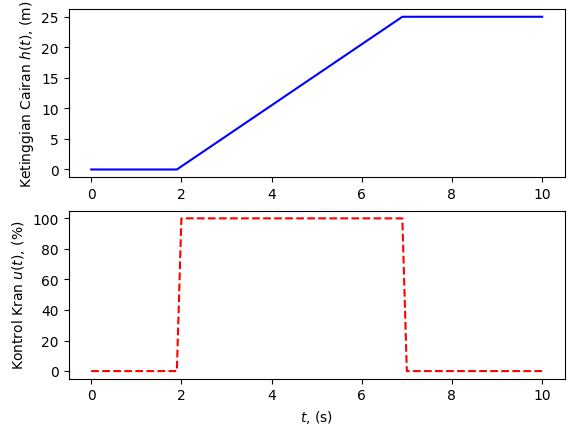

In [ ]:
plt.rcParams['text.usetex'] = False
plt.figure()
plt.subplot(2,1,1)
plt.plot(ts, z, 'b-')
plt.ylabel(r'Ketinggian Cairan $h(t)$, (m)')
plt.subplot(2,1,2)
plt.plot(ts, u, 'r--')
plt.ylabel(r'Kontrol Kran $u(t)$, $(\%)$')
plt.xlabel(r'$t$, (s)')
plt.show()

Saat kran
dibuka penuh u = 100% saat 2 s ≤ t ≤ 7 s, ketinggian cairan bertambah secara linear, yang merupakan
akumulasi atau integral dari persamaan

# Kasus Dinamis
 Pada kasus ini, kran outlet dibuka uo = 100% pada saat 3 s ≤ t ≤ 6 s. Kran inlet ui = 50%
saat 2 s ≤ t ≤ 7 s

In [ ]:
def tank(Level, time, c, valve1, valve2):
  rho = 1000.0
  A = 1.0
  dLevel_dt = (c / (rho * A)) * (valve1 + valve2)
  return dLevel_dt

#define tank ini dirubah, karena ada 2 posisi keran

Kodingan yang sama namun dirubah di beberapa tempat, seperti operasi valve menjadi :

In [ ]:
ui = np.zeros(101)
ui[20:70] = 50.0
uo= np.zeros(101)
uo[30:60] = 100.0
#perbedaan besaran buka keran dan waktu pembukaan untuk memberikan hasil yang lebih dinamis dan mencegah bottlenecking pada simulasi real

In [ ]:
Level0 = 0
z = np.zeros(101)

In [ ]:
for i in range(100):
  valve1 = ui[i+1]
  valve2 = uo[i+1]
  y = odeint(tank, Level0, [0,0.1], args=(c, valve1, valve2))
  Level0 = y[-1]
  z[i +1] = Level0

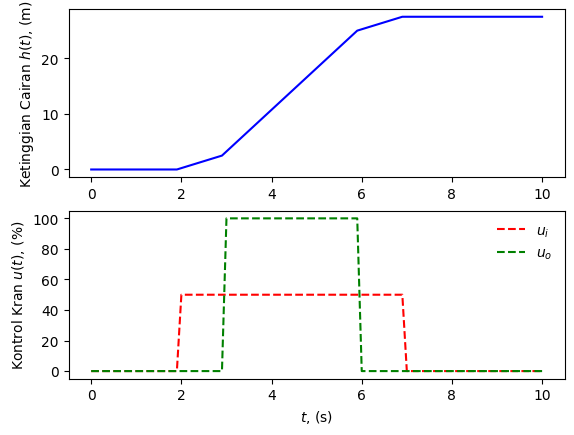

In [ ]:
plt.rcParams['text.usetex'] = False
plt.figure()
plt.subplot(2,1,1)
plt.plot(ts, z, 'b-')
plt.ylabel(r'Ketinggian Cairan $h(t)$, (m)')
plt.subplot(2,1,2)
plt.plot(ts, ui, 'r--')
plt.plot(ts, uo, 'g--')
plt.ylabel(r'Kontrol Kran $u(t)$, $(\%)$')
plt.xlabel(r'$t$, (s)')
plt.legend([r'$u_i$',r'$u_o$'], frameon=False)
plt.show()

Kontrol kran dapat dikendalikan sehingga output yang dihasilkan dapat menjadi lebih landai dan stabil, ketimbang contoh pertama yang menghasilkan kenaikan output yang sangat tajam.

Simulasi ini dapat diaplikasikan kedalam contoh kasus seperti buka-tutup jalur kemacetan dan juga antrian.